# **Proyecto 2: Ingeniería de Features, Modelos Avanzados e Interpretación de Modelo**




Cargo el dataset y comienzo el analisis exploratorio de los datos para luego hacer el preprocesamiento de los mismos.

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Cargo y visualizo las primeras 5 instancias del dataset:
prop = pd.read_csv("/content/drive/MyDrive/DS_Proyecto_01_Datos_Properati.csv", engine='python')
prop.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [ ]:
#Veo el tamaño del dataset (numero de filas y columnas)
print("Tamaño del dataset - filas, columnas:", prop.shape)

Tamaño del dataset - filas, columnas: (146660, 19)


In [ ]:
#Nombres de cada columna del dataset
print("Nombre de las columnas del dataset:", prop.columns)

Nombre de las columnas del dataset: Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')


In [ ]:
#Veo los valores faltantes en cada atributo:
print("La cantidad de valores faltantes por columna son:\n", prop.isna().sum())

La cantidad de valores faltantes por columna son:
 start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Veo los tipos de propiedad que aparecen en el dataset:
print("Los tipos de propiedades publicados son:\n", prop["property_type"].value_counts())


Los tipos de propiedades publicados son:
 Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64


Text(0.5, 1.0, 'Cantidad de propiedades de cada tipo')

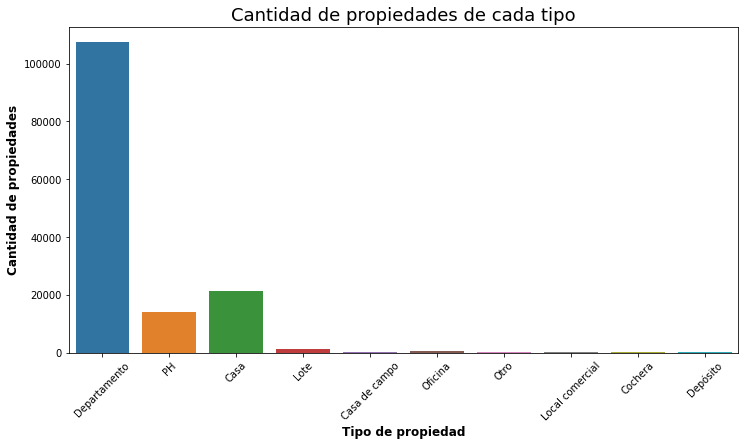

In [ ]:
plt.subplots(figsize = (12,6))
sns.countplot(data = prop, x = "property_type")
plt.xlabel("Tipo de propiedad", fontweight = "black", fontsize = 12)
plt.ylabel("Cantidad de propiedades", fontweight = "black", fontsize = 12)
plt.xticks(rotation = 45)
plt.title("Cantidad de propiedades de cada tipo", fontsize=18, color="black")

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
#Cambio el nombre de algunas columnas:
prop.rename(columns={"l1" : 'country', "l2" : 'city', "l3": "barrio"}, inplace=True)
prop.head()

,start_date,end_date,created_on,lat,lon,country,city,barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88]), <a list of 89 Text major ticklabel objects>)

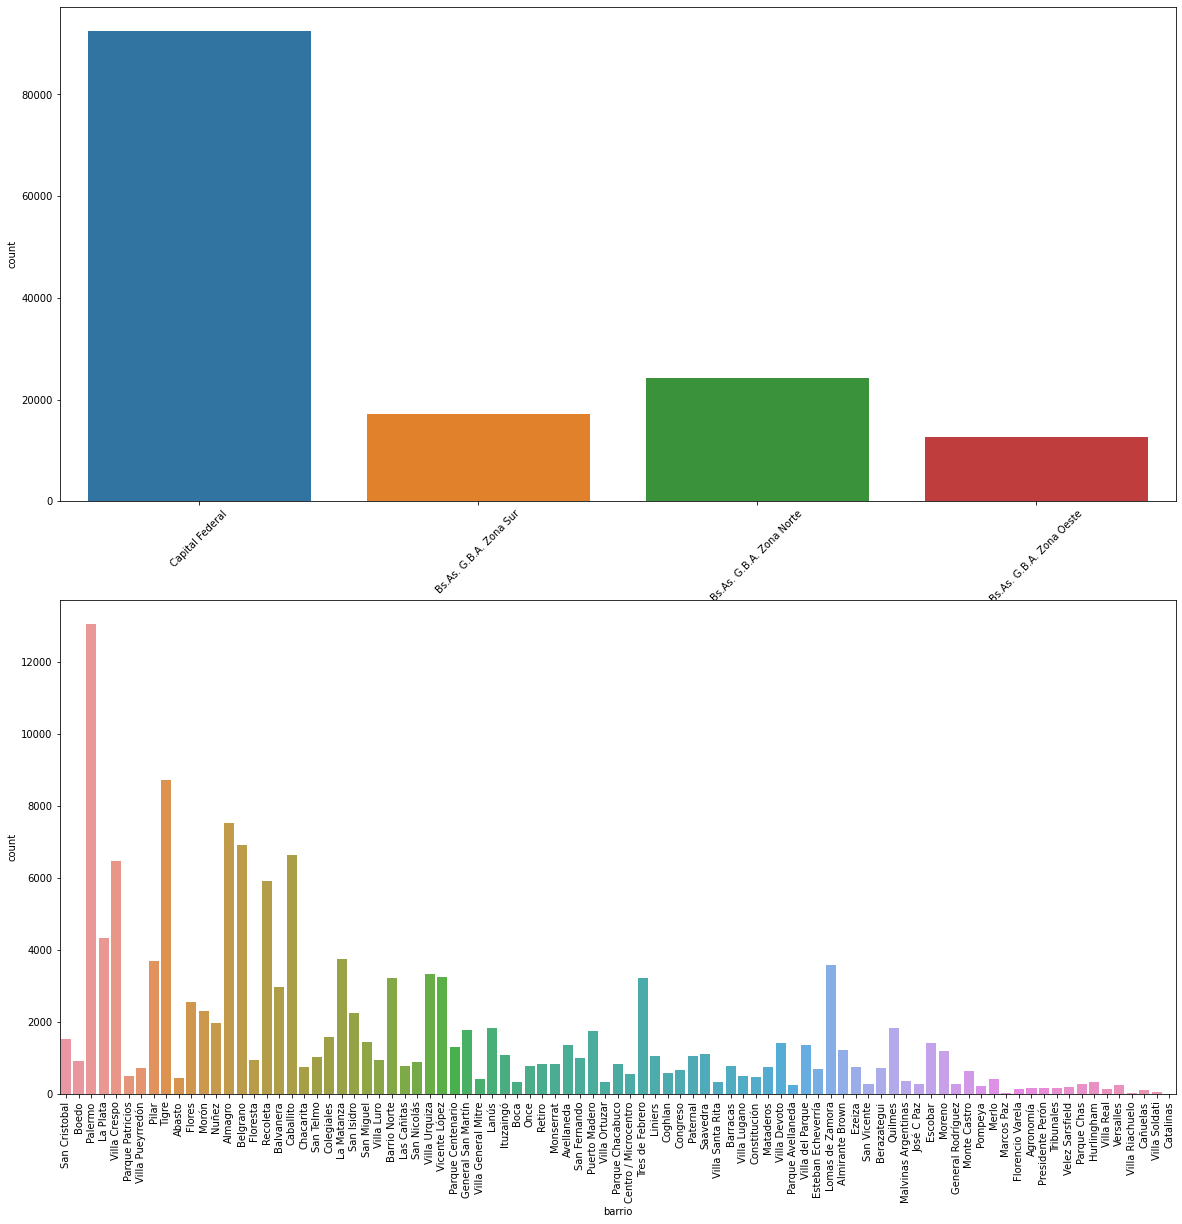

In [ ]:
#Grafico distribucion de las zonas y barrios
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
sns.countplot(data = prop, x = "city")
plt.xticks(rotation = 45)
plt.subplot(2,1,2)
sns.countplot(data = prop, x = "barrio")
plt.xticks(rotation = 90)

Decido comenzar a trabajar con solo 3 tipos de propiedades: Departamento, Casa y PH de Capital Federal. El resto de los datos no los voy a usar.

In [ ]:
#Selecciono las 3 clases mas abundantes y genero un nuevo dataset:
prop1=prop[prop.property_type.isin(["Departamento", "PH","Casa"])]
prop1.head()

,start_date,end_date,created_on,lat,lon,country,city,barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [ ]:
#Filtro solo lo que corresponda a Capital Federal:
prop1=prop1[prop1.city.isin(["Capital Federal"])]
prop1.head()

,start_date,end_date,created_on,lat,lon,country,city,barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta


In [ ]:
#Me quedo solo con las propiedades que sean para "venta" y que tengan sus precios expresados en "USD":
prop1=prop1[(prop1.operation_type=="Venta")&(prop1.currency=="USD")]

In [ ]:
#Elimino las columnas innecesarias:
prop1=prop1.drop(columns=["created_on","country", "city", "currency", "title", "description", "operation_type"])

In [ ]:
prop1.head()

,start_date,end_date,lat,lon,barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,2019-10-17,2019-12-23,-34.605880,-58.384949,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,2019-10-17,2019-11-21,-34.624056,-58.412110,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,2019-10-17,2019-11-01,-34.593569,-58.427474,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,2019-10-17,2019-12-23,-34.581294,-58.436754,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,2019-10-17,2019-11-01,-34.593779,-58.441239,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH


In [ ]:
print("El tamaño del nuevo dataset es: ", prop1.shape)

El tamaño del nuevo dataset es:  (91485, 12)


In [ ]:
#Veo los valores faltantes en cada atributo en este dataset:
print("La cantidad de valores faltantes por columna son:\n", prop1.isna().sum())

La cantidad de valores faltantes por columna son:
 start_date            0
end_date              0
lat                4534
lon                4548
barrio                0
rooms                 0
bedrooms              0
bathrooms          2171
surface_total      8917
surface_covered    9235
price                 0
property_type         0
dtype: int64


**DEPENDENCIA DATOS FALTANTES:** Voy a probar dependencia de los datos faltantes con la variable categórica property_type
 (MAR respecto a property_type).
 

In [ ]:
sc=prop1.surface_covered.isnull().groupby([prop1['property_type']]).sum().astype(int).reset_index(name='count')
sc

,property_type,count
0,Casa,448
1,Departamento,8714
2,PH,73


In [ ]:
st=prop1.surface_total.isnull().groupby([prop1['property_type']]).sum().astype(int).reset_index(name='count')
st

,property_type,count
0,Casa,438
1,Departamento,8437
2,PH,42


In [ ]:
bath=prop1.bathrooms.isnull().groupby([prop1['property_type']]).sum().astype(int).reset_index(name='count')
bath

,property_type,count
0,Casa,146
1,Departamento,1937
2,PH,88


In [ ]:
ln=prop1.lon.isnull().groupby([prop1['property_type']]).sum().astype(int).reset_index(name='count')
ln

,property_type,count
0,Casa,55
1,Departamento,4258
2,PH,235


In [ ]:
lt=prop1.lat.isnull().groupby([prop1['property_type']]).sum().astype(int).reset_index(name='count')
lt

,property_type,count
0,Casa,53
1,Departamento,4247
2,PH,234


Pero en realidad lo que nos interesa es la frecuencia de estos valores faltantes, porque no todos los intervalos tienen la misma cantidad de instancias.

In [ ]:
total=prop1["property_type"].value_counts()
total

Departamento    79029
PH               9764
Casa             2692
Name: property_type, dtype: int64

In [ ]:
sc['freq'] = sc['count']/prop1.groupby([prop1['property_type']]).count()['surface_covered'].values
sc

,property_type,count,freq
0,Casa,448,0.199643
1,Departamento,8714,0.123928
2,PH,73,0.007533


In [ ]:
st['freq'] = st['count']/prop1.groupby([prop1['property_type']]).count()['surface_total'].values
st

,property_type,count,freq
0,Casa,438,0.194321
1,Departamento,8437,0.119518
2,PH,42,0.004320


In [ ]:
bath['freq'] = bath['count']/prop1.groupby([prop1['property_type']]).count()['bathrooms'].values
bath

,property_type,count,freq
0,Casa,146,0.057345
1,Departamento,1937,0.025126
2,PH,88,0.009095


In [ ]:
ln['freq'] = ln['count']/prop1.groupby([prop1['property_type']]).count()['lon'].values
ln

,property_type,count,freq
0,Casa,55,0.020857
1,Departamento,4258,0.056947
2,PH,235,0.024662


In [ ]:
lt['freq'] = lt['count']/prop1.groupby([prop1['property_type']]).count()['lat'].values
lt

,property_type,count,freq
0,Casa,53,0.020083
1,Departamento,4247,0.056792
2,PH,234,0.024554


**Comentario:** Pareceria haber dependencia de superficie total y cubierta con el tipo de propiedad, ya que el 20% de los faltantes corresponden al tipo de propiedad "Casa". Las variables: numero de baños, latitud y longitud no muestran dependencia con el tipo de propiedad. Por lo tanto voy a eliminar los faltantes de baños, longitud y latitud e imputar los faltantes de superficie cubierta y total. **Antes de imputar voy a trabajar los outliers asi no me afectan la imputación.**

In [ ]:
#Elimino los faltantes sin dependencia:
prop1=prop1.dropna(subset = ["bathrooms", "lon", "lat"])


In [ ]:
print(prop1.isna().sum())

start_date            0
end_date              0
lat                   0
lon                   0
barrio                0
rooms                 0
bedrooms              0
bathrooms             0
surface_total      7393
surface_covered    7666
price                 0
property_type         0
dtype: int64


**Comentario:** me queda superficie total y cubierta que los voy a imputar. Pero primero voy a trabajar los outliers, con lo cual voy a ver algunos estadisticos de las variables de interes para luego hacer boxplot. Asi visualizar los datos atípicos, aplicar percentiles y algun tipo de filtro que haga falta.

In [ ]:
prop1[["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price"]].describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,84820.000000,84820.000000,84820.000000,77427.000000,77154.000000,8.482000e+04
mean,2.968816,1.964525,1.545190,112.938691,95.003785,2.544509e+05
std,1.310102,1.069289,0.843973,1012.059846,803.093083,3.158469e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,70.000000,63.000000,1.750000e+05
75%,4.000000,3.000000,2.000000,110.000000,95.000000,2.730000e+05
max,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


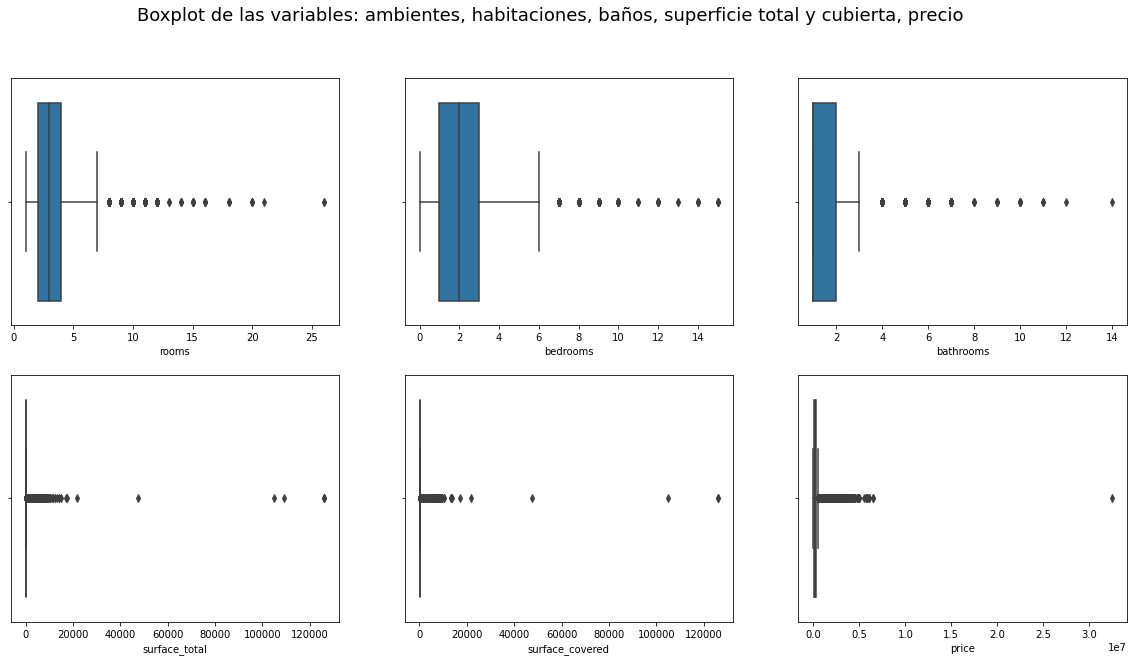

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.suptitle("Boxplot de las variables: ambientes, habitaciones, baños, superficie total y cubierta, precio", fontsize=18, color = "black")
sns.boxplot(x=prop1["rooms"])
plt.subplot(2,3,2)
sns.boxplot(x=prop1["bedrooms"])
plt.subplot(2,3,3)
sns.boxplot(x=prop1["bathrooms"])
plt.subplot(2,3,4)
sns.boxplot(x=prop1["surface_total"])
plt.subplot(2,3,5)
sns.boxplot(x=prop1["surface_covered"])
plt.subplot(2,3,6)
sns.boxplot(x=prop1["price"])

In [ ]:
mínimo = prop1.quantile (0.1) 
máximo = prop1.quantile (0.9)
IQR = máximo - mínimo 

prop2 = prop1[~ ((prop1 < (mínimo - 1.5 * IQR)) | (prop1 > (máximo + 1.5 * IQR))).any(axis=1)]

In [ ]:
prop2[["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price"]].describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,81452.000000,81452.000000,81452.000000,74173.000000,73905.000000,81452.000000
mean,2.863920,1.887909,1.474476,84.690534,73.607361,215333.207742
std,1.137984,0.960111,0.732843,53.107056,42.946820,146303.490533
min,1.000000,0.000000,1.000000,10.000000,1.000000,6000.000000
25%,2.000000,1.000000,1.000000,48.000000,44.000000,120000.000000
50%,3.000000,2.000000,1.000000,69.000000,60.000000,170000.000000
75%,4.000000,3.000000,2.000000,102.000000,90.000000,260000.000000
max,7.000000,6.000000,6.000000,385.000000,320.000000,990000.000000


Notar que superficie cubierta tiene un valor minimo de 1 m2, lo cual es ilógico. De manera que, manualmente voy a filtrar para que el menor valor de superficie cubierta sea 10 m2 (coincidente con el minimo encontrado en superficie total).

In [ ]:
prop2=prop2[(prop2.surface_covered > 10)]

In [ ]:
prop2[["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price"]].describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,73838.000000,73838.000000,73838.000000,73692.000000,73838.000000,73838.000000
mean,2.894065,1.917915,1.463352,84.718626,73.672269,217247.143219
std,1.123720,0.932428,0.718109,53.092795,42.912145,146726.502693
min,1.000000,0.000000,1.000000,10.000000,13.000000,6000.000000
25%,2.000000,1.000000,1.000000,48.000000,44.000000,120000.000000
50%,3.000000,2.000000,1.000000,69.000000,60.000000,172000.000000
75%,4.000000,3.000000,2.000000,102.000000,90.000000,260000.000000
max,7.000000,6.000000,6.000000,385.000000,320.000000,990000.000000


**Comentario:** ahora voy a imputar los faltantes que me quedaban en superficie total y cubierta **segun tipo de propiedad**. Luego vuelvo a visualizar las variables.

In [ ]:
media_sc = prop2[["surface_covered","property_type"]].groupby("property_type").agg(pd.Series.mean)
media_sc = media_sc.to_dict()["surface_covered"]

In [ ]:
media_sc

{'Casa': 161.86104368932038,
 'Departamento': 68.93491852974611,
 'PH': 91.14569686017619}

In [ ]:
prop2.set_index("property_type", inplace=True)

In [ ]:
prop2.head()

,start_date,end_date,lat,lon,barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
property_type,,,,,,,,,,,
PH,2019-10-17,2019-11-21,-34.624056,-58.412110,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0
PH,2019-10-17,2019-11-01,-34.593569,-58.427474,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0
PH,2019-10-17,2019-12-23,-34.581294,-58.436754,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0
PH,2019-10-17,2019-11-01,-34.593779,-58.441239,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0
PH,2019-10-17,2019-10-31,-34.600988,-58.433061,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0


In [ ]:
prop2.surface_covered.fillna(media_sc, inplace=True)

In [ ]:
prop2.isna().sum()

start_date           0
end_date             0
lat                  0
lon                  0
barrio               0
rooms                0
bedrooms             0
bathrooms            0
surface_total      146
surface_covered      0
price                0
dtype: int64

In [ ]:
prop2.reset_index(inplace=True)
prop2.head()

,property_type,start_date,end_date,lat,lon,barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,PH,2019-10-17,2019-11-21,-34.624056,-58.412110,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0
1,PH,2019-10-17,2019-11-01,-34.593569,-58.427474,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0
2,PH,2019-10-17,2019-12-23,-34.581294,-58.436754,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0
3,PH,2019-10-17,2019-11-01,-34.593779,-58.441239,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0
4,PH,2019-10-17,2019-10-31,-34.600988,-58.433061,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0


In [ ]:
media_st = prop2[["surface_total","property_type"]].groupby("property_type").agg(pd.Series.mean)
media_st = media_st.to_dict()["surface_total"]

In [ ]:
media_st

{'Casa': 207.73990208078337,
 'Departamento': 77.32574583188332,
 'PH': 114.84830316742081}

In [ ]:
prop2.set_index("property_type", inplace=True)

In [ ]:
prop2.head()

,start_date,end_date,lat,lon,barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
property_type,,,,,,,,,,,
PH,2019-10-17,2019-11-21,-34.624056,-58.412110,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0
PH,2019-10-17,2019-11-01,-34.593569,-58.427474,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0
PH,2019-10-17,2019-12-23,-34.581294,-58.436754,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0
PH,2019-10-17,2019-11-01,-34.593779,-58.441239,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0
PH,2019-10-17,2019-10-31,-34.600988,-58.433061,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0


In [ ]:
prop2.surface_total.fillna(media_st, inplace=True)

In [ ]:
prop2.isna().sum()

start_date         0
end_date           0
lat                0
lon                0
barrio             0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
dtype: int64

In [ ]:
prop2.reset_index(inplace=True)
prop2.head()

,property_type,start_date,end_date,lat,lon,barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,PH,2019-10-17,2019-11-21,-34.624056,-58.412110,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0
1,PH,2019-10-17,2019-11-01,-34.593569,-58.427474,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0
2,PH,2019-10-17,2019-12-23,-34.581294,-58.436754,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0
3,PH,2019-10-17,2019-11-01,-34.593779,-58.441239,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0
4,PH,2019-10-17,2019-10-31,-34.600988,-58.433061,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

Text(0, 0.5, 'Proporción de propiedades')

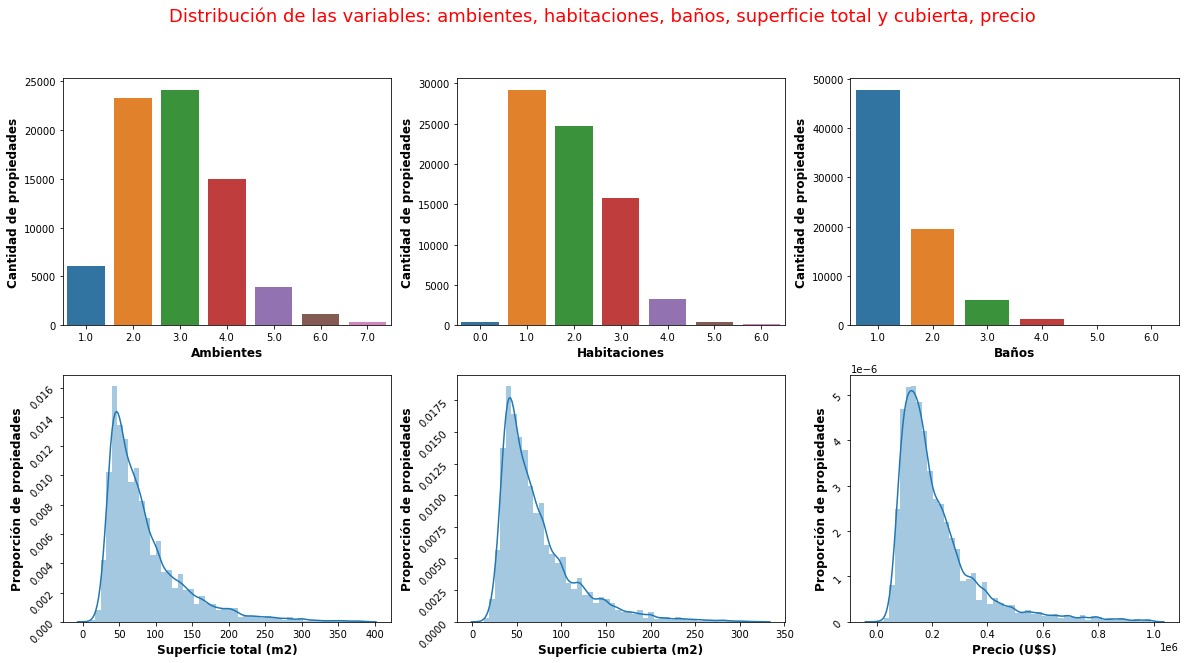

In [ ]:
#Realizamos unos gráficos de barra para las variables discretas e histogramas para las continuas, para tener una mejor visualización de las distribuciones
plt.figure(figsize = (20,10))
plt.suptitle("Distribución de las variables: ambientes, habitaciones, baños, superficie total y cubierta, precio", fontsize=18, color = "r")

plt.subplot(2,3,1)
sns.countplot(prop2.rooms)
plt.xlabel("Ambientes", fontweight = "black", fontsize = 12)
plt.ylabel("Cantidad de propiedades", fontweight = "black", fontsize = 12)

plt.subplot(2,3,2)
sns.countplot(prop2.bedrooms)
plt.xlabel("Habitaciones", fontweight = "black", fontsize = 12)
plt.ylabel("Cantidad de propiedades", fontweight = "black", fontsize = 12)

plt.subplot(2,3,3)
sns.countplot(prop2.bathrooms)
plt.xlabel("Baños", fontweight = "black", fontsize = 12)
plt.ylabel("Cantidad de propiedades", fontweight = "black", fontsize = 12)

plt.subplot(2,3,4)
sns.distplot(prop2.surface_total)
plt.yticks(rotation = 45)
plt.xlabel("Superficie total (m2)", fontweight = "black", fontsize = 12)
plt.ylabel("Proporción de propiedades", fontweight = "black", fontsize = 12)

plt.subplot(2,3,5)
sns.distplot(prop2.surface_covered)
plt.yticks(rotation = 45)
plt.xlabel("Superficie cubierta (m2)", fontweight = "black", fontsize = 12)
plt.ylabel("Proporción de propiedades", fontweight = "black", fontsize = 12)

plt.subplot(2,3,6)
sns.distplot(prop2.price)
plt.yticks(rotation = 45)
plt.xlabel("Precio (U$S)", fontweight = "black", fontsize = 12)
plt.ylabel("Proporción de propiedades", fontweight = "black", fontsize = 12)

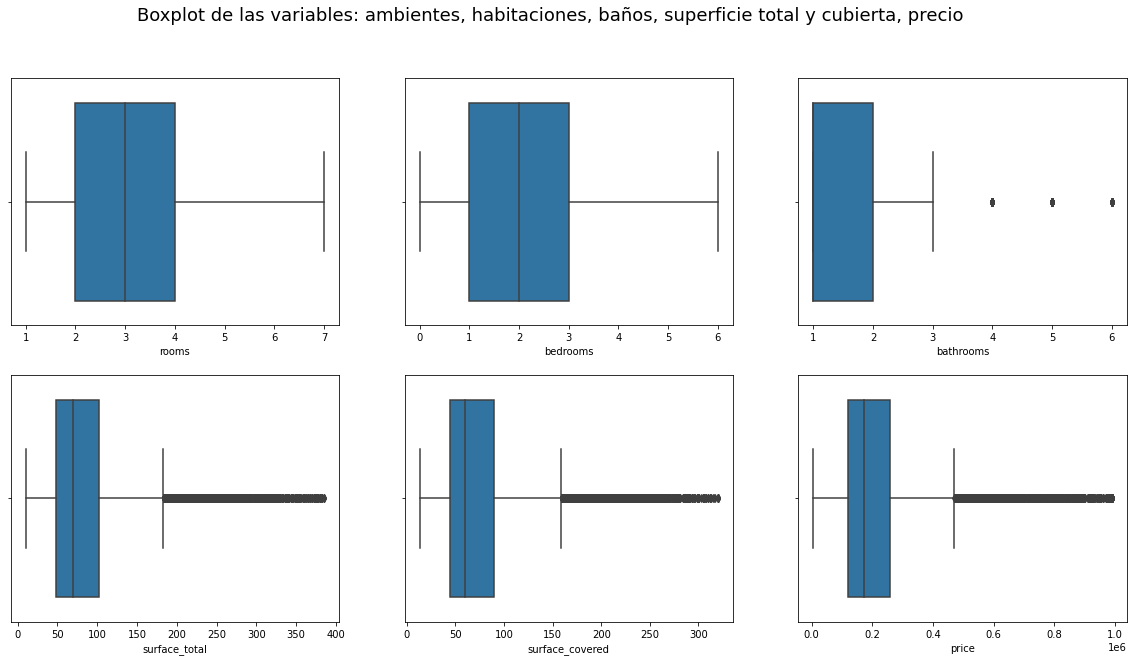

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.suptitle("Boxplot de las variables: ambientes, habitaciones, baños, superficie total y cubierta, precio", fontsize=18, color = "black")
sns.boxplot(x=prop2["rooms"])
plt.subplot(2,3,2)
sns.boxplot(x=prop2["bedrooms"])
plt.subplot(2,3,3)
sns.boxplot(x=prop2["bathrooms"])
plt.subplot(2,3,4)
sns.boxplot(x=prop2["surface_total"])
plt.subplot(2,3,5)
sns.boxplot(x=prop2["surface_covered"])
plt.subplot(2,3,6)
sns.boxplot(x=prop2["price"])

**Encoding:** Convierto los atributos categóricos 'property_type' en valores numéricos. En el Proyecto 1 no usábamos esta información como variable, sino únicamente en la fase exploratoria del conjunto de datos, o particularmente property_type como delimitante de los datos.

In [ ]:
dicc = {"Casa": 3, "PH": 2, "Departamento": 1}

In [ ]:
prop2.property_type = prop2.property_type.map(dicc)
prop2 = pd.get_dummies(prop2, columns=["property_type"])

In [ ]:
prop2.head()

,start_date,end_date,lat,lon,barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type_1,property_type_2,property_type_3
0,2019-10-17,2019-11-21,-34.624056,-58.412110,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,0,1,0
1,2019-10-17,2019-11-01,-34.593569,-58.427474,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,0,1,0
2,2019-10-17,2019-12-23,-34.581294,-58.436754,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,0,1,0
3,2019-10-17,2019-11-01,-34.593779,-58.441239,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,0,1,0
4,2019-10-17,2019-10-31,-34.600988,-58.433061,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,0,1,0


**Escalado de datos:** voy a escalar todas las variables continuas, excepto la variable que usare con target (price). Esto lo hago con el objetivo de que no me afecte la magnitud de cada variable en los modelos. 

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X = prop2.drop(columns=["price","barrio", "start_date", "end_date"])

In [ ]:
X.head()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type_1,property_type_2,property_type_3
0,-34.624056,-58.412110,2.0,1.0,2.0,70.0,58.0,0,1,0
1,-34.593569,-58.427474,2.0,1.0,1.0,45.0,45.0,0,1,0
2,-34.581294,-58.436754,2.0,1.0,1.0,85.0,50.0,0,1,0
3,-34.593779,-58.441239,2.0,1.0,1.0,56.0,56.0,0,1,0
4,-34.600988,-58.433061,2.0,1.0,1.0,70.0,70.0,0,1,0


In [ ]:
escalador = StandardScaler()

In [ ]:
X_escalado = escalador.fit_transform(X)
X_escalado

array([[-1.09595115,  0.66938645, -0.79563561, ..., -2.45577916,
         2.70915256, -0.15109152],
       [ 0.20873556,  0.2345008 , -0.79563561, ..., -2.45577916,
         2.70915256, -0.15109152],
       [ 0.73404501, -0.02818046, -0.79563561, ..., -2.45577916,
         2.70915256, -0.15109152],
       ...,
       [ 0.56025283,  0.24243776,  0.09427202, ..., -2.45577916,
         2.70915256, -0.15109152],
       [ 0.61249319, -0.01784032,  0.98417966, ..., -2.45577916,
         2.70915256, -0.15109152],
       [ 0.618438  ,  0.5127172 ,  0.09427202, ...,  0.40720274,
        -0.36911912, -0.15109152]])

**Comentario:** para los modelos voy a utilizar como variable *y*: price. Como variables X todas las variables X_escaladas.

**TABLA RESUMEN MODELOS DEL PROYECTO 1: el Nº 4 fue el que elegí como superior en dicho proyecto:**

In [ ]:
resumen = {"Modelos del Proyecto 1":["Benchmark", "Árbol de decisión", "Vecinos más cercanos", "Árbol de decisión", "Árbol de decisión", "Vecinos más cercanos"], 
           "Hiper-parámetros":["profundidad máxima = 6", "profundidad máxima = 10", "número de vecinos = 5", "profundidad máxima = 10","profundidad máxima = 10" , "número de vecinos = 5"], 
           "Variables X": [3, 3, 3, 5, 4, 4], "RMSE (test)":["~183000", "~168000", "~161000", "~100000", "~98000","~140000" ]}
pd.DataFrame(resumen)

,Modelos del Proyecto 1,Hiper-parámetros,Variables X,RMSE (test)
0,Benchmark,profundidad máxima = 6,3,~183000
1,Árbol de decisión,profundidad máxima = 10,3,~168000
2,Vecinos más cercanos,número de vecinos = 5,3,~161000
3,Árbol de decisión,profundidad máxima = 10,5,~100000
4,Árbol de decisión,profundidad máxima = 10,4,~98000
5,Vecinos más cercanos,número de vecinos = 5,4,~140000


Ahora voy a correr ese modelo Nº 4 con las nuevas variables:


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np


In [ ]:
#Arbol de decision del proyecto Nº1:
X = X_escalado
y = prop2["price"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
tree_1 = DecisionTreeRegressor(max_depth = 10)

In [ ]:
tree_1.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_test_pred = tree_1.predict(X_test)
y_train_pred = tree_1.predict(X_train)

In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 50113.41479583892
Raíz del error cuadrático medio en Test: 55989.18641199262


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'y- predichos')

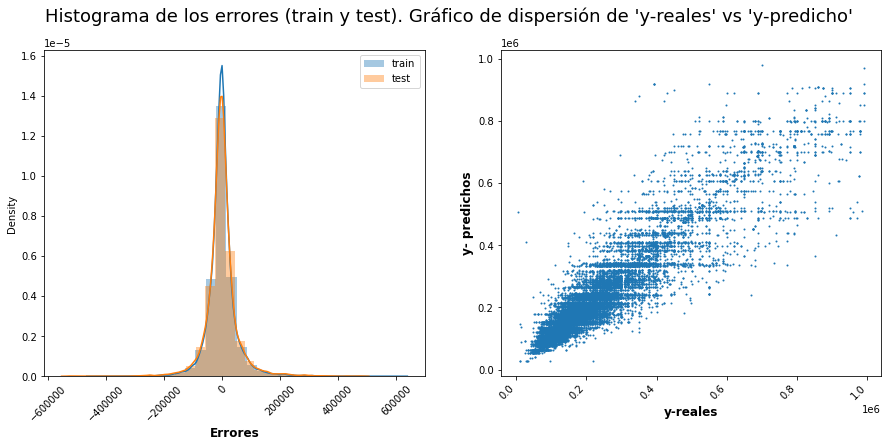

In [ ]:
plt.figure(figsize = (15,6))
plt.suptitle("Histograma de los errores (train y test). Gráfico de dispersión de 'y-reales' vs 'y-predicho'", fontsize = 18, color = "black")

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 30, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 30, label = 'test')
plt.xlabel("Errores", fontweight = "black", fontsize = 12)
plt.xticks(rotation = 45)
plt.legend()

plt.subplot(1,2,2)
plt.scatter(y_test, y_test_pred, s=1) 
plt.xticks(rotation = 45, horizontalalignment="right")
plt.xlabel("y-reales", fontweight = "black", fontsize = 12)
plt.ylabel("y- predichos", fontweight = "black", fontsize = 12)

**Comparación modelo Proyecto 1 vs Proyecto 2:** luego de correr el modelo del proyecto 1 pero con el preprocesamiento llevado a cabo en las variables, se ve que los errores del train y del test disminuyen notablemete (un 40% aproximadamente), a su vez, la varianza elevada que tenia en el primer proyecto, disminuyó. De todas maneras, se sigue evidenciando algo de sobreajuste. La grafica de y-reales vs y-predichos tiene mal ajuste.

**Comentarios:** lo que tendria que hacer para solucionar esto (varianza alta y sesgo bajo) sería: disminuir la complejidad del modelo (optimizando hiperparámetros o usando modelos mas simples) o hacer ensamble tipo bagging. 

Ahora voy a probar **Regresion lineal**:

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#Regresion lineal 
X = X_escalado
y = prop2["price"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
reg_1 = LinearRegression()

In [ ]:
reg_1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_train_pred_1 = reg_1.predict(X_train)
y_test_pred_1 = reg_1.predict(X_test)

In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_1))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_1))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 77770.00487698372
Raíz del error cuadrático medio en Test: 77500.70868441087


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'y- predichos')

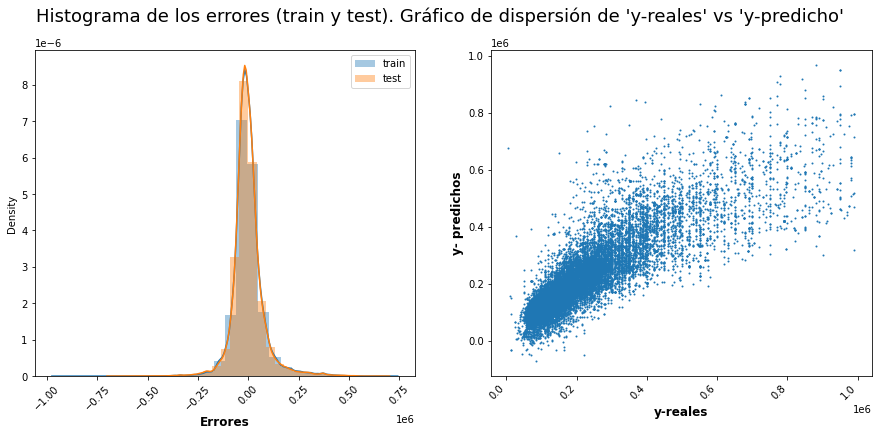

In [ ]:
plt.figure(figsize = (15,6))
plt.suptitle("Histograma de los errores (train y test). Gráfico de dispersión de 'y-reales' vs 'y-predicho'", fontsize = 18, color = "black")

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred_1, bins = 30, label = 'train')
sns.distplot(y_test - y_test_pred_1, bins = 30, label = 'test')
plt.xlabel("Errores", fontweight = "black", fontsize = 12)
plt.xticks(rotation = 45)
plt.legend()

plt.subplot(1,2,2)
plt.scatter(y_test, y_test_pred_1, s=1) 
plt.xticks(rotation = 45, horizontalalignment="right")
plt.xlabel("y-reales", fontweight = "black", fontsize = 12)
plt.ylabel("y- predichos", fontweight = "black", fontsize = 12)

**Comentarios**:si bien con la regresion lineal los errores me aumentaron respecto al arbol de decision, no se evidencia overfitting puesto que ambos errores son similares. La gráfica de y-reales vs y-predichos es buena aunque le faltaria algo de ajuste.

**MODELOS AVANZADOS:** Ahora mi idea seria probar agregando **atributos polinomicos con regularización, luego Random Forest y un modelo de ensamble tipo bagging**. En primer lugar probar con los argumentos de estos modelos por defecto para luego optimizarlos.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
X = X_escalado
y = prop2["price"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [ ]:
poly = PolynomialFeatures(2, include_bias=False)
X_train_new = poly.fit_transform(X_train)
X_test_new = poly.fit_transform(X_test)
print(X_train_new.shape, X_test_new.shape)

(51686, 65) (22152, 65)


In [ ]:
reg_2 = LinearRegression()
reg_2.fit(X_train_new, y_train)
print(reg_2.coef_, reg_2.intercept_)
y_train_pred_2 = reg_2.predict(X_train_new)
y_test_pred_2 = reg_2.predict(X_test_new)

[ 4.02763553e+04  2.10151547e+04 -8.31247530e+03 -1.33435923e+04
  2.82146857e+04  5.71764471e+04  7.69172947e+04  1.25393705e+16
 -1.27074159e+16  2.40337078e+16  1.61283627e+03  1.26198851e+04
  2.83160553e+03 -5.04434470e+02 -2.67836858e+03  1.56859278e+03
  1.62894787e+04  1.21010722e+16  1.12547411e+16  5.11775693e+15
  6.46576169e+03 -4.52151895e+03 -1.02003167e+04  6.56174346e+03
  2.89885472e+03  1.50544952e+04 -1.80606328e+16 -1.67974988e+16
 -7.63816024e+15 -3.17930429e+03  6.18842906e+03 -1.31452764e+04
 -2.58025845e+03  8.09000000e+03 -5.68263297e+15 -5.28519801e+15
 -2.40328573e+15 -4.62400000e+03  1.88800000e+03  4.76009375e+03
 -1.01505000e+04 -1.11854759e+16 -1.04031802e+16 -4.73053509e+15
 -1.28750000e+03  3.48100000e+03  6.33900000e+03 -3.24858376e+14
 -3.02138261e+14 -1.37388338e+14 -5.53775000e+03  2.84600000e+03
  3.02417768e+15  2.81267116e+15  1.27897809e+15 -7.39500000e+03
 -7.48837927e+15 -6.96465308e+15 -3.16696770e+15  6.30667740e+15
  1.10386300e+16 -7.36527

In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_2))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_2))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 67965.47721790633
Raíz del error cuadrático medio en Test: 67900.48379738352


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'y- predichos')

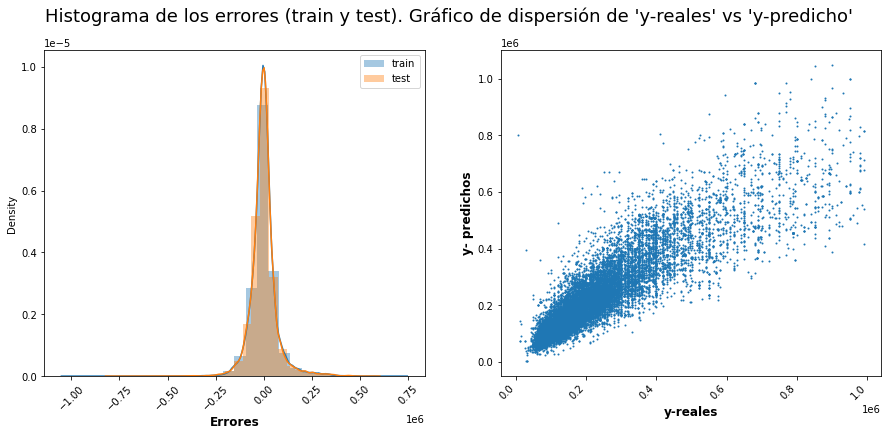

In [ ]:
plt.figure(figsize = (15,6))
plt.suptitle("Histograma de los errores (train y test). Gráfico de dispersión de 'y-reales' vs 'y-predicho'", fontsize = 18, color = "black")

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred_2, bins = 30, label = 'train')
sns.distplot(y_test - y_test_pred_2, bins = 30, label = 'test')
plt.xlabel("Errores", fontweight = "black", fontsize = 12)
plt.xticks(rotation = 45)
plt.legend()

plt.subplot(1,2,2)
plt.scatter(y_test, y_test_pred_2, s=1) 
plt.xticks(rotation = 45, horizontalalignment="right")
plt.xlabel("y-reales", fontweight = "black", fontsize = 12)
plt.ylabel("y- predichos", fontweight = "black", fontsize = 12)

**Comentarios:** aca hice polinomio de segundo grado (como viene por defecto) y los errores del train y test dan mas bajos que con regresion lineal. Ahora voy a hacer regularización aunque no observo overfitting.

In [ ]:
from sklearn.linear_model import Ridge

reg_ridge = Ridge(alpha= 0.1)
reg_ridge.fit(X_train_new,y_train)

print(f'Pendientes: {reg_ridge.coef_}')
print(f'Ordenada: {reg_ridge.intercept_}')

Pendientes: [ 40276.2503828   20585.37990188  -9265.1688674  -12772.9131762
  26928.72303537  55691.21647968  79725.83491593    751.23409808
   -718.68079895   -195.82247864   1542.62628592  13001.13117858
   3141.15673484  -1819.0065002   -2091.85247168   1717.47449813
  16527.82667294   1444.56696291   -446.62219063  -2433.52550329
   5839.64335581  -4729.44915642  -9685.26794093   6183.10116291
   3546.85420649  14499.58231926    474.09247264    749.50021697
  -2769.27154505  -2264.51994736   4914.63676186 -12805.59890553
  -2607.45099385   7261.74027271  -2029.91846635   1187.2588921
   2188.82962936  -3988.48623858   2075.31595483   4040.88090791
  -9516.44631374  -1969.46816009   2418.16128128   -661.05181349
  -1174.001911     4191.52834663   5518.73825244   2712.4274846
  -2395.23382017  -1146.11631695  -4686.91278889   1157.93030227
   3545.76397674  -2944.56614451  -1908.49553634  -6451.59709921
   2934.22288469  -4414.4165331    2769.93857197  -1538.96049832
   1487.62647571

In [ ]:
y_train_pred_3 = reg_ridge.predict(X_train_new)
y_test_pred_3 = reg_ridge.predict(X_test_new)

In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_3))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_3))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 67935.71143231078
Raíz del error cuadrático medio en Test: 67889.08347811985


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'y- predichos')

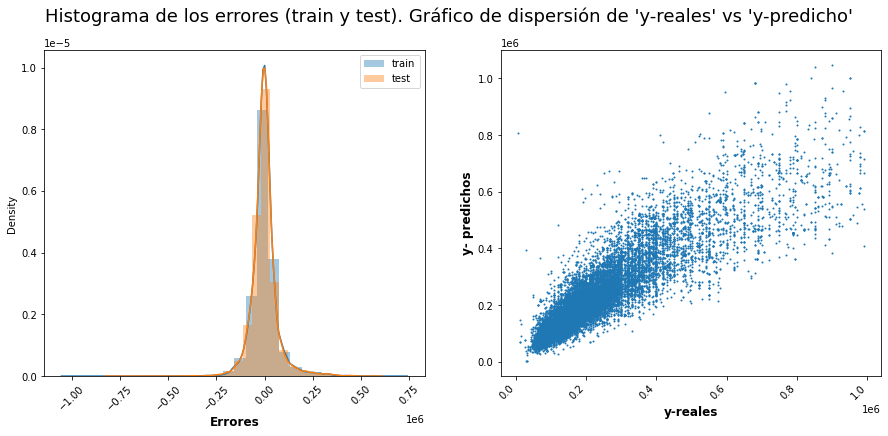

In [ ]:
plt.figure(figsize = (15,6))
plt.suptitle("Histograma de los errores (train y test). Gráfico de dispersión de 'y-reales' vs 'y-predicho'", fontsize = 18, color = "black")

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred_3, bins = 30, label = 'train')
sns.distplot(y_test - y_test_pred_3, bins = 30, label = 'test')
plt.xlabel("Errores", fontweight = "black", fontsize = 12)
plt.xticks(rotation = 45)
plt.legend()

plt.subplot(1,2,2)
plt.scatter(y_test, y_test_pred_3, s=1) 
plt.xticks(rotation = 45, horizontalalignment="right")
plt.xlabel("y-reales", fontweight = "black", fontsize = 12)
plt.ylabel("y- predichos", fontweight = "black", fontsize = 12)

**Comentarios:** los errores quedaron casi iguales en las polinomicas con y sin regulación, esto es porque no habia overfitting antes de aplicar la regulacion . Hasta aca no se lograron bajar los errores respecto al arbol de decision con las nuevas variables. La grafica de dispersión y-reales vs y-predichos sigue mostrando mal ajuste. Lo que voy a hacer otro modelo avanzado: Random Forest Regressor.

In [ ]:
from sklearn.ensemble import RandomForestRegressor


In [ ]:
X = X_escalado
y = prop2["price"]

In [ ]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split (X, y, test_size = 0.30)

In [ ]:
modelo_rf = RandomForestRegressor()
modelo_rf.fit(X_train_rf,y_train_rf)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_test_pred_rf = modelo_rf.predict (X_test_rf)
y_train_pred_rf = modelo_rf.predict (X_train_rf)

Raíz del error cuadrático medio en Train: 15407.401999574915
Raíz del error cuadrático medio en Test: 37122.70751668714


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


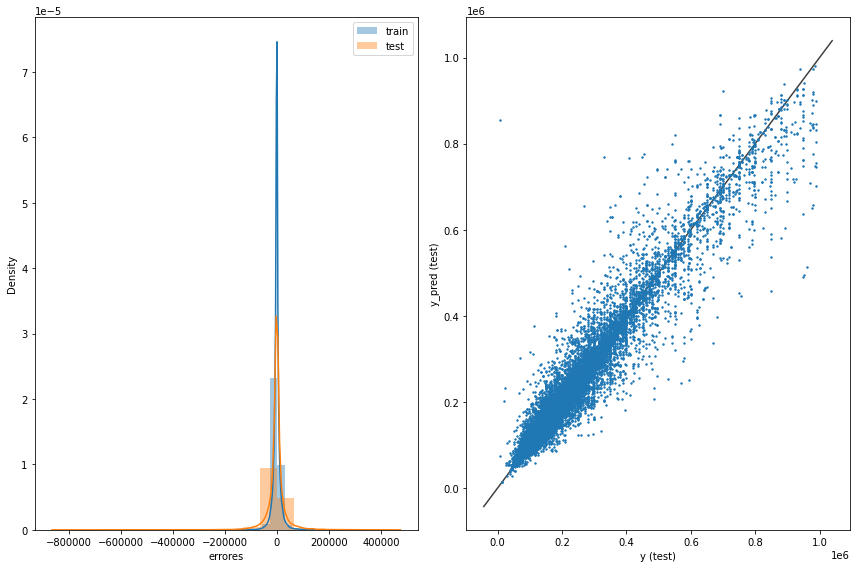

In [ ]:
from sklearn.metrics import mean_squared_error

rmse_train_rf = np.sqrt(mean_squared_error(y_train_rf, y_train_pred_rf))
rmse_test_rf = np.sqrt(mean_squared_error(y_test_rf, y_test_pred_rf))
print(f'Raíz del error cuadrático medio en Train: {rmse_train_rf}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test_rf}')

plt.figure(figsize = (12,8))

plt.subplot(1,2,1)
sns.distplot(y_train_rf - y_train_pred_rf, bins = 20, label = 'train')
sns.distplot(y_test_rf - y_test_pred_rf, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test_rf,y_test_pred_rf, s =2)

lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

**Comentarios:** el random forest dio errores mas bajos pero tengo overfitting elevado. Los errores no son simetricos como en los modelos anteriores. La grafica de *y-predichos* vs *y-reales* tiene mejor ajuste. 

**Para ver resumidamente los modelos que tengo hasta aca, antes de optimizar hiperparámetros:**

In [ ]:
resumen = {"Modelos del Proyecto 2 SIN OPTIMIZAR":["Arbol de decisión", "Regresion lineal", "Polinomial + Ridge", "Random Forest"], 
           "Hiper-parámetros":["profundidad máxima = 10", "por defecto", "por defecto", "por defecto"], 
           "Variables X_escaladas": [10, 10, 10, 10], "RMSE (test)":["~56000", "~77000", "~67000", "~37000"], "Sobreajuste": ["medio", "no", "no", "si!"]}
pd.DataFrame(resumen)

,Modelos del Proyecto 2 SIN OPTIMIZAR,Hiper-parámetros,Variables X_escaladas,RMSE (test),Sobreajuste
0,Arbol de decisión,profundidad máxima = 10,10,~56000,medio
1,Regresion lineal,por defecto,10,~77000,no
2,Polinomial + Ridge,por defecto,10,~67000,no
3,Random Forest,por defecto,10,~37000,si!


Los modelos que mejor resultados me dieron muestran overfitting.Tengo varianza alta y sesgo bajo. En estos casos deberia: disminuir la complejidad del modelo (optimizando hiperparámetros y/o usando modelos mas simples) o hacer ensamble. 

**Ahora voy a Optimizar hiperparámetros en el modelo Random Forest:**


In [ ]:
#OPTIMIZACIÓN RANDOM FOREST REGRESSOR (ya saque los hiperparametros por eso comento la parte de optimización):
from sklearn.model_selection import RandomizedSearchCV


#model = modelo_rf
#param_grid = {'n_estimators': np.arange(1,100), 'criterion': ['auto', 'mse'],'max_features': ['auto', 'sqrt'], 'max_depth': np.arange (1,100)}
#random_search = RandomizedSearchCV(model, param_grid, n_jobs = 1, cv = 2, n_iter = 33)
#random_search.fit(X,y)
#print(random_search.best_params_)

In [ ]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split (X, y, test_size = 0.30)

In [ ]:
#Aca corro el modelo con los hiperparametros que me dio la optimización:
properati_rf_optim = RandomForestRegressor(n_estimators = 97, max_features = 'auto', max_depth = 25, criterion = 'mse')
properati_rf_optim.fit(X_train_rf,y_train_rf)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=25, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=97, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
score = properati_rf_optim.score(X_train_rf, y_train_rf)  
print("Training score Random Forest Regressor: ", score)

Training score Random Forest Regressor:  0.9893288916008689


In [ ]:
from sklearn.model_selection import cross_val_score, KFold

scores = cross_val_score(properati_rf_optim, X_train_rf, y_train_rf,cv=5)
print("Mean cross-validation score Random Forest Regressor: %.2f" % scores.mean())

Mean cross-validation score Random Forest Regressor: 0.93


In [ ]:
kfold_rf = KFold(n_splits=5, shuffle=True)
kf_cv_scores_rf = cross_val_score(properati_rf_optim, X_train_rf, y_train_rf, cv=kfold_rf )
print("K-fold CV average score Random Forest Regressor: %.2f" % kf_cv_scores_rf.mean())

K-fold CV average score Random Forest Regressor: 0.93


In [ ]:
ypred_test_rf = properati_rf_optim.predict(X_test_rf)
ypred_train_rf = properati_rf_optim.predict(X_train_rf )
mse = mean_squared_error(y_test_rf, ypred_test_rf)
print("MSE Random Forest Regressor: %.2f" % mse)
print("RMSE Random Forest Regressor: %.2f" % (mse**(1/2.0)))

MSE Random Forest Regressor: 1410744048.24
RMSE Random Forest Regressor: 37559.87


Raíz del error cuadrático medio en Train: 15185.889389107806
Raíz del error cuadrático medio en Test: 37559.872846442595


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


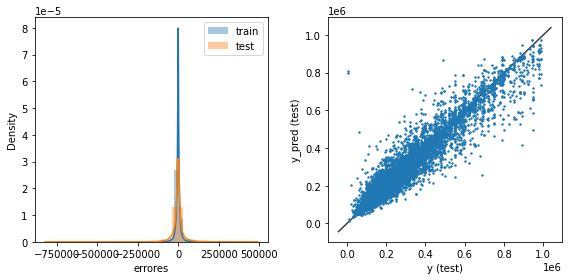

In [ ]:
rmse_train_rf_optim = np.sqrt(mean_squared_error(y_train_rf, ypred_train_rf))
rmse_test_rf_optim = np.sqrt(mean_squared_error(y_test_rf, ypred_test_rf))
print(f'Raíz del error cuadrático medio en Train: {rmse_train_rf_optim}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test_rf_optim}')

plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train_rf - ypred_train_rf, bins = 20, label = 'train')
sns.distplot(y_test_rf - ypred_test_rf, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test_rf,ypred_test_rf, s =2)

lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

**Comentario:** el Random Forest optimizado me sigue dando overfitting elevado. Los errores siguen siendo asimetricos. La grafica *y* vs *y-predichos* muestra buen ajuste.

**Ahora voy a Optimizar hiperparámetros en el modelo Arbol de decisión:**

In [ ]:
#OPTIMIZACIÓN ARBOL DE DECISIÓN (ya saque los hiperparametros por eso comento la parte de optimización):
#model = tree_1
#param_grid = {'max_depth':np.arange(1, 10), 'criterion': ['mse'], 'min_samples_split':[2,3,4], 'min_samples_leaf':[2,3,4]}
#random_search = RandomizedSearchCV (model, param_grid, n_jobs = 1, cv = 2, n_iter = 33)
#random_search.fit(X,y)
#print(random_search.best_params_)

In [ ]:
#Arbol de decision con los hiperparametros que me tiro la optimización:
X = X_escalado
y = prop2["price"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
tree_opt = DecisionTreeRegressor(max_depth = 9,criterion= "mse",min_samples_split= 4,
            min_samples_leaf=3)

In [ ]:
tree_opt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=9,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_test_pred = tree_opt.predict(X_test)
y_train_pred = tree_opt.predict(X_train)

In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 54615.25518318523
Raíz del error cuadrático medio en Test: 58290.83432683211


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'y- predichos')

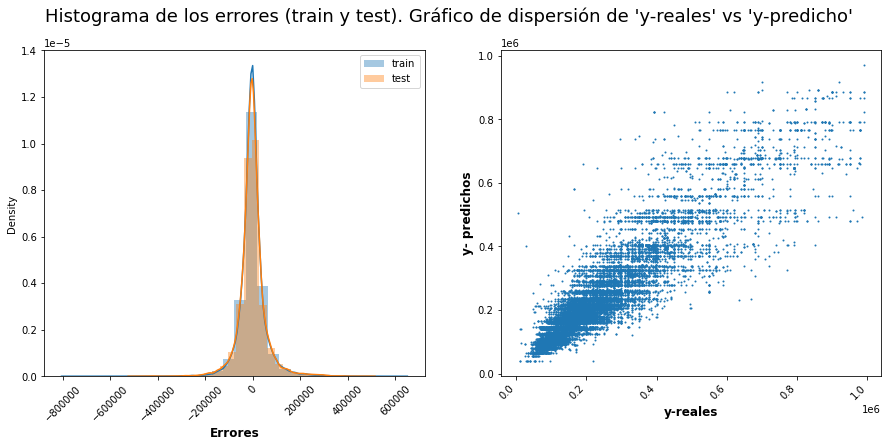

In [ ]:
plt.figure(figsize = (15,6))
plt.suptitle("Histograma de los errores (train y test). Gráfico de dispersión de 'y-reales' vs 'y-predicho'", fontsize = 18, color = "black")

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 30, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 30, label = 'test')
plt.xlabel("Errores", fontweight = "black", fontsize = 12)
plt.xticks(rotation = 45)
plt.legend()

plt.subplot(1,2,2)
plt.scatter(y_test, y_test_pred, s=1) 
plt.xticks(rotation = 45, horizontalalignment="right")
plt.xlabel("y-reales", fontweight = "black", fontsize = 12)
plt.ylabel("y- predichos", fontweight = "black", fontsize = 12)

**Comentario:** el arbol de decisión optimizado no muestra casi sobreajuste y los errores parecen mas simetricos. La grafica de y-predichos vs y-reales tiene mal ajuste.

**XGBOOST REGRESSOR** 

Elijo probar con el modelo XGBoost en su modalidad Regresor. El Boosting es una técnica en la que se agregan nuevos modelos para corregir los errores cometidos por los modelos existentes. Los modelos se agregan secuencialmente hasta que no quede ningún error para eliminar. En el caso de XGBoost se llama Gradient Boost porque utiliza un algoritmo de descenso de gradiente para minimizar la pérdida al agregar nuevos modelos.


In [ ]:
import xgboost as xgb

In [ ]:
xtrain_xgb, xtest_xgb, ytrain_xgb, ytest_xgb=train_test_split(X, y, test_size=0.30)

In [ ]:
xgbr = xgb.XGBRegressor(n_estimators = 50, max_depth = 62) 
print(xgbr)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=62, min_child_weight=1, missing=None, n_estimators=50,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
#OPTIMIZACIÓN XGBOOST (ya saque los hiperparametros por eso comento la parte de optimización):
#model = xgbr
#param_grid = {'n_estimators': np.arange(1,100), 'max_depth': np.arange (1,100), 'random_state': np.arange (1,100)}
#random_search = RandomizedSearchCV(model, param_grid, n_jobs = 1, cv = 2, n_iter = 33)
#random_search.fit(X,y)
#print(random_search.best_params_)

Entreno el modelo con parametros optimizados:

In [ ]:
xtrain_xgb, xtest_xgb, ytrain_xgb, ytest_xgb=train_test_split(X, y, test_size=0.30)
xgbr1 = xgb.XGBRegressor(n_estimators = 77, max_depth = 18, random_state=62) 
print(xgbr1)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=18, min_child_weight=1, missing=None, n_estimators=77,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=62,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)


In [ ]:
 xgbr1.fit(xtrain_xgb, ytrain_xgb)   

[15:45:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=18, min_child_weight=1, missing=None, n_estimators=77,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=62,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

Evalúo el modelo

In [ ]:
score = xgbr1.score(xtrain_xgb, ytrain_xgb)  
print("Training score: ", score)

Training score:  0.9972470254550106


In [ ]:
scores = cross_val_score(xgbr1, xtrain_xgb, ytrain_xgb,cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

[15:45:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:46:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:46:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:46:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:46:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean cross-validation score: 0.93


In [ ]:
kfold = KFold(n_splits=5, shuffle=True)
kf_cv_scores = cross_val_score(xgbr1, xtrain_xgb, ytrain_xgb, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

[15:46:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:47:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:47:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:47:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:47:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
K-fold CV average score: 0.93


In [ ]:
ypred_test_xgb = xgbr1.predict(xtest_xgb)
ypred_train_xgb = xgbr1.predict(xtrain_xgb )
mse = mean_squared_error(ytest_xgb, ypred_test_xgb)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

MSE: 1368178166.46
RMSE: 36988.89


In [ ]:
rmse_train = np.sqrt(mean_squared_error(ytrain_xgb, ypred_train_xgb))
rmse_test = np.sqrt(mean_squared_error(ytest_xgb, ypred_test_xgb))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 7677.386628496173
Raíz del error cuadrático medio en Test: 36988.8924741033


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'y- predichos')

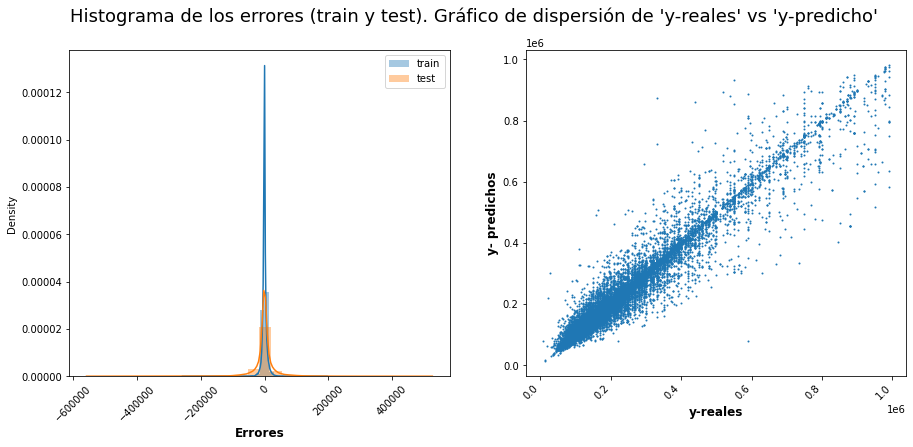

In [ ]:
plt.figure(figsize = (15,6))
plt.suptitle("Histograma de los errores (train y test). Gráfico de dispersión de 'y-reales' vs 'y-predicho'", fontsize = 18, color = "black")

plt.subplot(1,2,1)
sns.distplot(ytrain_xgb - ypred_train_xgb, bins = 30, label = 'train')
sns.distplot(ytest_xgb - ypred_test_xgb, bins = 30, label = 'test')
plt.xlabel("Errores", fontweight = "black", fontsize = 12)
plt.xticks(rotation = 45)
plt.legend()

plt.subplot(1,2,2)
plt.scatter(ytest_xgb, ypred_test_xgb, s=1) 
plt.xticks(rotation = 45, horizontalalignment="right")
plt.xlabel("y-reales", fontweight = "black", fontsize = 12)
plt.ylabel("y- predichos", fontweight = "black", fontsize = 12)

**Comentario:** este modelo me da excelentes errores pero sigo con un gran overfitting. Se evidencia gran asimetria en la grafica de los errores. Lo que voy a hacer es correr este ultimo modelo pero voy a elegir menos variables. Para esto, voy a ver la importancia de cada una en este modelo:

In [ ]:
import pandas as pd


In [ ]:
prop3=pd.DataFrame(X_escalado)
prop3.head()

,0,1,2,3,4,5,6,7,8,9
0,-1.095951,0.669386,-0.795636,-0.984442,0.747312,-0.277671,-0.365220,-2.455779,2.709153,-0.151092
1,0.208736,0.234501,-0.795636,-0.984442,-0.645244,-0.748753,-0.668167,-2.455779,2.709153,-0.151092
2,0.734045,-0.028180,-0.795636,-0.984442,-0.645244,0.004977,-0.551649,-2.455779,2.709153,-0.151092
3,0.199746,-0.155126,-0.795636,-0.984442,-0.645244,-0.541477,-0.411827,-2.455779,2.709153,-0.151092
4,-0.108768,0.076342,-0.795636,-0.984442,-0.645244,-0.277671,-0.085577,-2.455779,2.709153,-0.151092


In [ ]:
prop3.rename(columns={0: "lat",1 : 'lon',2: "room",3: "bedroom", 4:"bathroom", 5: "surface_total", 6:"surface_covered", 7:"Departamentos", 8:"PH", 9:"Casas"}, inplace=True)
prop3.head()

,lat,lon,room,bedroom,bathroom,surface_total,surface_covered,Departamentos,PH,Casas
0,-1.095951,0.669386,-0.795636,-0.984442,0.747312,-0.277671,-0.365220,-2.455779,2.709153,-0.151092
1,0.208736,0.234501,-0.795636,-0.984442,-0.645244,-0.748753,-0.668167,-2.455779,2.709153,-0.151092
2,0.734045,-0.028180,-0.795636,-0.984442,-0.645244,0.004977,-0.551649,-2.455779,2.709153,-0.151092
3,0.199746,-0.155126,-0.795636,-0.984442,-0.645244,-0.541477,-0.411827,-2.455779,2.709153,-0.151092
4,-0.108768,0.076342,-0.795636,-0.984442,-0.645244,-0.277671,-0.085577,-2.455779,2.709153,-0.151092


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


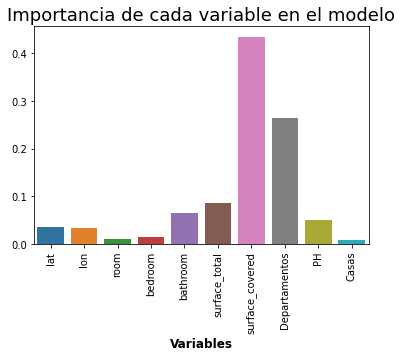

In [ ]:
importances = xgbr1.feature_importances_
columns = prop3.columns

plt.figure(figsize = (6, 4))
sns.barplot(columns, importances)
plt.xlabel("Variables", fontweight = "black", fontsize = 12)
plt.title("Importancia de cada variable en el modelo", fontsize = 18, color = "black")
plt.xticks(rotation = 90)
plt.show()

**Comentario:** viendo la importancia de las variables voy a correr el modelo nuevamente pero solo con las variables que mas importancia tienen: superficie cubierta, total, baños y departamentos. De esta manera bajaria el nivel de complejdad del modelo y, posiblemente lograria disminuir el overfitting.

In [ ]:
import xgboost as xgb
X_new= prop3.drop(columns=["lat", "lon", "room", "bedroom", "PH", "Casas"])
xtrain_xgb, xtest_xgb, ytrain_xgb, ytest_xgb=train_test_split(X_new, y, test_size=0.30)

In [ ]:
xgbr_new = xgb.XGBRegressor(n_estimators = 50, max_depth = 62) 
print(xgbr_new)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=62, min_child_weight=1, missing=None, n_estimators=50,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)


In [ ]:
#OPTIMIZACIÓN DEL NUEVO XGBOOST (ya saque los hiperparametros por eso comento la parte de optimización):
from sklearn.model_selection import RandomizedSearchCV
#model = xgbr_new
#param_grid = {'n_estimators': np.arange(1,100), 'max_depth': np.arange (1,100), 'random_state': np.arange (1,100)}
#random_search = RandomizedSearchCV(model, param_grid, n_jobs = 1, cv = 2, n_iter = 33)
#random_search.fit(X_new,y)
#print(random_search.best_params_)

Entreno el modelo con parametros optimizados:

In [ ]:
xgbr_new1 = xgb.XGBRegressor(n_estimators = 79, max_depth = 13, random_state=4) 
print(xgbr_new1)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=13, min_child_weight=1, missing=None, n_estimators=79,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=4,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)


In [ ]:
 xgbr_new1.fit(xtrain_xgb, ytrain_xgb)   

[15:48:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=13, min_child_weight=1, missing=None, n_estimators=79,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=4,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

Evalúo el modelo

In [ ]:
score = xgbr_new1.score(xtrain_xgb, ytrain_xgb)  
print("Training score: ", score)

Training score:  0.872814115874978


In [ ]:
scores = cross_val_score(xgbr_new1, xtrain_xgb, ytrain_xgb,cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

[15:48:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:48:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:48:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:48:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:48:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean cross-validation score: 0.78


In [ ]:
kfold = KFold(n_splits=5, shuffle=True)
kf_cv_scores = cross_val_score(xgbr_new1, xtrain_xgb, ytrain_xgb, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

[15:48:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:48:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:48:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:48:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:48:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
K-fold CV average score: 0.78


In [ ]:
ypred_test_xgb = xgbr_new1.predict(xtest_xgb)
ypred_train_xgb = xgbr_new1.predict(xtrain_xgb )
mse = mean_squared_error(ytest_xgb, ypred_test_xgb)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

MSE: 4676665340.01
RMSE: 68386.15


In [ ]:
rmse_train = np.sqrt(mean_squared_error(ytrain_xgb, ypred_train_xgb))
rmse_test = np.sqrt(mean_squared_error(ytest_xgb, ypred_test_xgb))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 52145.33175763233
Raíz del error cuadrático medio en Test: 68386.14874379677


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'y- predichos')

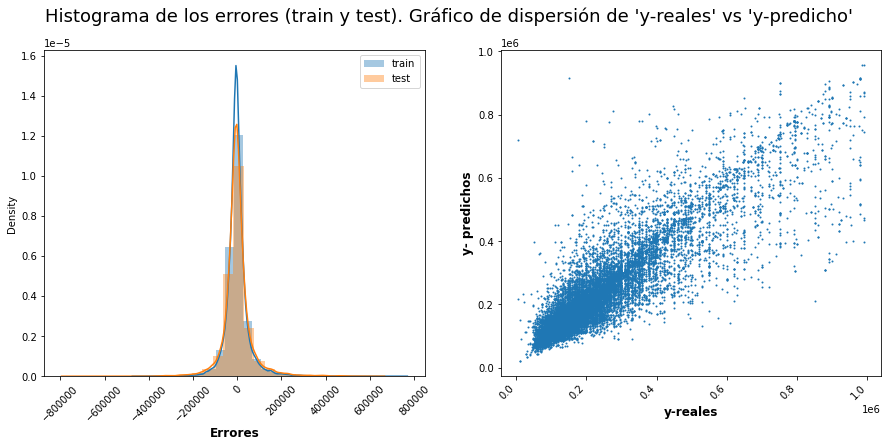

In [ ]:
plt.figure(figsize = (15,6))
plt.suptitle("Histograma de los errores (train y test). Gráfico de dispersión de 'y-reales' vs 'y-predicho'", fontsize = 18, color = "black")

plt.subplot(1,2,1)
sns.distplot(ytrain_xgb - ypred_train_xgb, bins = 30, label = 'train')
sns.distplot(ytest_xgb - ypred_test_xgb, bins = 30, label = 'test')
plt.xlabel("Errores", fontweight = "black", fontsize = 12)
plt.xticks(rotation = 45)
plt.legend()

plt.subplot(1,2,2)
plt.scatter(ytest_xgb, ypred_test_xgb, s=1) 
plt.xticks(rotation = 45, horizontalalignment="right")
plt.xlabel("y-reales", fontweight = "black", fontsize = 12)
plt.ylabel("y- predichos", fontweight = "black", fontsize = 12)

**Comentario:** aca logre bajar el overfitting, usando menos variables en el modelo XGBOOST pero los errores me resultan elevados. El grafico de dispersión no muestra un buen ajuste. 

**Voy a hacer un arbol de decision eliminando variables (segun la importancia en el modelo) para bajar su complejidad. Con el objetivo de bajar la varianza de dicho modelo.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


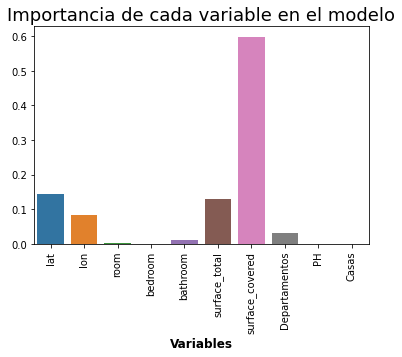

In [ ]:
importances = tree_opt.feature_importances_
columns = prop3.columns

plt.figure(figsize = (6, 4))
sns.barplot(columns, importances)
plt.xlabel("Variables", fontweight = "black", fontsize = 12)
plt.title("Importancia de cada variable en el modelo", fontsize = 18, color = "black")
plt.xticks(rotation = 90)
plt.show()

Por importancia voy a usar: latitud, longitud, baños, superficie total y cubierta.

In [ ]:
X_new1= prop3.drop(columns=["room", "bedroom", "PH", "Casas", "Departamentos"])
y=prop2["price"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new1, y, test_size = 0.3, random_state = 42)

In [ ]:
tree_new = DecisionTreeRegressor(max_depth = 10)

In [ ]:
tree_new.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_test_pred = tree_new.predict(X_test)
y_train_pred = tree_new.predict(X_train)

In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 50906.4043338498
Raíz del error cuadrático medio en Test: 57353.277612835416


In [ ]:
#OPTIMIZACIÓN DEL NUEVO ARBOL DE DECISIÓN (ya saque los hiperparametros por eso comento la parte de optimización):
from sklearn.model_selection import RandomizedSearchCV
#model = tree_new
#param_grid = {'max_depth':np.arange(1, 10), 'criterion': ['mse'], 'min_samples_split':[2,3,4], 'min_samples_leaf':[2,3,4]}
#random_search = RandomizedSearchCV (model, param_grid, n_jobs = 1, cv = 2, n_iter = 33)
#random_search.fit(X_new1,y)
#print(random_search.best_params_)

In [ ]:
tree_opt1 = DecisionTreeRegressor(max_depth = 9,criterion= "mse",min_samples_split= 4,
            min_samples_leaf=4)

In [ ]:
tree_opt1.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=9,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_test_pred = tree_opt1.predict(X_test)
y_train_pred = tree_opt1.predict(X_train)

In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 55272.766524540726
Raíz del error cuadrático medio en Test: 58272.609164883615


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'y- predichos')

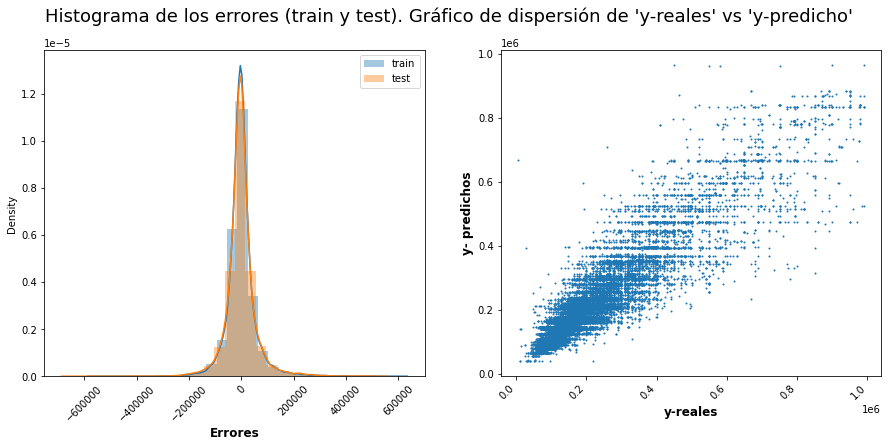

In [ ]:
plt.figure(figsize = (15,6))
plt.suptitle("Histograma de los errores (train y test). Gráfico de dispersión de 'y-reales' vs 'y-predicho'", fontsize = 18, color = "black")

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 30, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 30, label = 'test')
plt.xlabel("Errores", fontweight = "black", fontsize = 12)
plt.xticks(rotation = 45)
plt.legend()

plt.subplot(1,2,2)
plt.scatter(y_test, y_test_pred, s=1) 
plt.xticks(rotation = 45, horizontalalignment="right")
plt.xlabel("y-reales", fontweight = "black", fontsize = 12)
plt.ylabel("y- predichos", fontweight = "black", fontsize = 12)

Este nuevo arbol de decision sigue mostrando varianza aunque de menor magnitud que el anterior y la grafica de dispersión no estaria mostrando un buen ajuste. **Ahora voy probar un ensamble tipo bagging para tratar de bajar la varianza del arbol de decision. Voy a poner como estimador base el ultimo arbol de decision obtenido (tree_opt1) y el resto de los hiper-parametros los dejo como vienen por defecto:**

In [ ]:
from sklearn.ensemble import BaggingRegressor
import sklearn.metrics as metrics

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new1, y, test_size = 0.3, random_state = 42)

In [ ]:
bagg = BaggingRegressor(base_estimator= tree_opt1)

In [ ]:
bagg.fit(X_train, y_train)
y_train_pred = bagg.predict(X_train)
y_test_pred = bagg.predict(X_test)

In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 52300.79753246735
Raíz del error cuadrático medio en Test: 54795.01384442716


**Por ultimo voy a correr el Random Forest pero antes voy a sacarle variables para bajar su complejidad (segun la importancia que tengan):**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


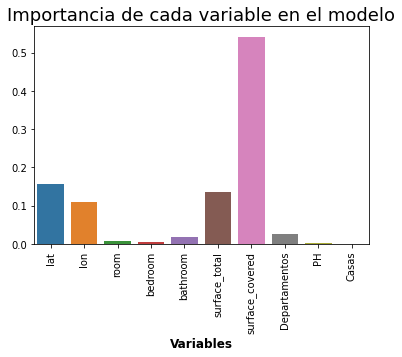

In [ ]:
importances = properati_rf_optim.feature_importances_
columns = prop3.columns

plt.figure(figsize = (6, 4))
sns.barplot(columns, importances)
plt.xlabel("Variables", fontweight = "black", fontsize = 12)
plt.title("Importancia de cada variable en el modelo", fontsize = 18, color = "black")
plt.xticks(rotation = 90)
plt.show()

Voy a usar las variables: latitud, longitud, superficie total y cubierta.

In [ ]:
X_new2= prop3.drop(columns=["room", "bathroom","Departamentos", "bedroom", "PH", "Casas"])
y=prop2["price"]

In [ ]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split (X_new2, y, test_size = 0.30)

In [ ]:
modelo_rfnew = RandomForestRegressor()
modelo_rfnew.fit(X_train_rf,y_train_rf)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_test_pred_rf = modelo_rfnew.predict (X_test_rf)
y_train_pred_rf = modelo_rfnew.predict (X_train_rf)

In [ ]:
rmse_train_rf = np.sqrt(mean_squared_error(y_train_rf, y_train_pred_rf))
rmse_test_rf = np.sqrt(mean_squared_error(y_test_rf, y_test_pred_rf))
print(f'Raíz del error cuadrático medio en Train: {rmse_train_rf}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test_rf}')

Raíz del error cuadrático medio en Train: 15998.004282167329
Raíz del error cuadrático medio en Test: 38941.956136995344


In [ ]:
#OPTIMIZACIÓN RANDOM FOREST REGRESSOR (ya saque los hiperparametros por eso comento la parte de optimización):
from sklearn.model_selection import RandomizedSearchCV
#model = modelo_rfnew
#param_grid = {'n_estimators': np.arange(1,100), 'criterion': ['auto', 'mse'],'max_features': ['auto', 'sqrt'], 'max_depth': np.arange (1,100)}
#random_search = RandomizedSearchCV(model, param_grid, n_jobs = 1, cv = 2, n_iter = 33)
#random_search.fit(X_new2,y)
#print(random_search.best_params_)

In [ ]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split (X_new2, y, test_size = 0.30)

In [ ]:
#Aca corro el modelo con los hiperparametros que me dio la optimización:
properati_rf_optimnew = RandomForestRegressor(n_estimators = 92, max_features = 'sqrt', max_depth = 81, criterion = 'mse')
properati_rf_optimnew.fit(X_train_rf,y_train_rf)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=81, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=92, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
score = properati_rf_optimnew.score(X_train_rf, y_train_rf)  
print("Training score Random Forest Regressor: ", score)

Training score Random Forest Regressor:  0.9877399199975041


In [ ]:
from sklearn.model_selection import cross_val_score, KFold

scores = cross_val_score(properati_rf_optimnew, X_train_rf, y_train_rf,cv=5)
print("Mean cross-validation score Random Forest Regressor: %.2f" % scores.mean())

Mean cross-validation score Random Forest Regressor: 0.92


In [ ]:
kfold_rf = KFold(n_splits=5, shuffle=True)
kf_cv_scores_rf = cross_val_score(properati_rf_optimnew, X_train_rf, y_train_rf, cv=kfold_rf )
print("K-fold CV average score Random Forest Regressor: %.2f" % kf_cv_scores_rf.mean())

K-fold CV average score Random Forest Regressor: 0.92


In [ ]:
ypred_test_rf = properati_rf_optimnew.predict(X_test_rf)
ypred_train_rf = properati_rf_optimnew.predict(X_train_rf )
mse = mean_squared_error(y_test_rf, ypred_test_rf)
print("MSE Test Random Forest Regressor: %.2f" % mse)
print("RMSE Test Random Forest Regressor: %.2f" % (mse**(1/2.0)))
msetrain = mean_squared_error(y_train_rf, ypred_train_rf)
print("MSE Train Random Forest Regressor: %.2f" % msetrain)
print("RMSE Train Random Forest Regressor: %.2f" % (msetrain**(1/2.0)))

MSE Test Random Forest Regressor: 1477678883.38
RMSE Test Random Forest Regressor: 38440.59
MSE Train Random Forest Regressor: 261595424.38
RMSE Train Random Forest Regressor: 16173.91


**Voy a resumir los modelos que tengo hasta ahora. Lo que hice fue optimizar hiperparámetros y bajar complejidad (disminuyendo el numero de variables, segun la importancia que tenian en cada modelo) para ver de bajar el overfitting.**

In [ ]:
resumen = {"Modelos del Proyecto OPTIMIZADOS":["Random Forest", "Arbol de decisión", "XGBOOST", "XGBOOST", "Arbol de decisión", "Bagging","Random Forest"], 
           "Nº VARIABLES":[10, 10, 10, 4, 5, 5,4], 
           "RMSE (train)": ["~15000", "~54000", "~8000", "~53000","~55000", "~52000","~16000"], "RMSE (test)":["~37000", "~58000", "~37000", "~66000", "~58000","~55000","~38000"], "Sobreajuste": ["si", "no", "si!", "medio", "no", "no","si"]}
pd.DataFrame(resumen)

,Modelos del Proyecto OPTIMIZADOS,Nº VARIABLES,RMSE (train),RMSE (test),Sobreajuste
0,Random Forest,10,~15000,~37000,si
1,Arbol de decisión,10,~54000,~58000,no
2,XGBOOST,10,~8000,~37000,si!
3,XGBOOST,4,~53000,~66000,medio
4,Arbol de decisión,5,~55000,~58000,no
5,Bagging,5,~52000,~55000,no
6,Random Forest,4,~16000,~38000,si


**CONCLUSIONES Y CONSIDERACIONES FINALES:**

Luego de trabajar los modelos presentados anteriormente podemos decir que, en la mayoria de los casos se evidenciaron problemas de alta varianza, en algunos modelos mas marcados que en otros. Esto hizo necesario optimizar hiperparámetros y reducir el numero de variables ingresadas a los mismos para tratar de bajar su complejidad. Por otro lado, se corrio y optimizo un modelo de ensamble (XGBOOST) y otro del mismo tipo (Bagging) usando como modelo base el arbol de decision optimizado.

> El modelo elegido en el proyecto Nº 1 mostraba valores de RMSE (test) de 98000 y un sobreajuste elevado. Dicho modelo era un arbol de decision de profundidad 10 con 4 variables dependientes.

> Independientemente del modelo que analicemos, y como puede verse en la tabla resumen presentada anteriormente, en lineas generales el RMSE (test) se logro disminuir entre un 33 y un 62%. Esto fue gracias al preprocesamiento realizado en la etapa inicial del analisis de datos y a la optimizacion de hiperparámetros en los modelos. En los casos en que mayor reduccion del error tengo, aparece varianza elevada. Para tratar de palear este inconveniente fue que optimice, reduje variables de entrada y use modeos de ensamble.

> Cuando evalué importancia de las variables, como criterio para reducir la complejidad de los modelos, en todos los casos aparecio la superficie total y cubierta como fundamentales a incluir en los modelos. Luego le seguian en importancia: número de baños y ubicacion (definida por latitud y longitud). En algunos casos tambien apareció el tipo de propiedad.

> Creo que en mi caso el error de los modelos no baja mas porque, si bien me focalice en trabajar con Capital Federal,  estoy metiendo una gran variabilidad segun el barrio al cual pertenece cada propiedad. Por otro lado, en algunos modelos se observo una importante asimetria en la grafica de los errores.










Luego de analizar los modelos elijo el **ensamble tipo Bagging con modelo base arbol de decision** (Nº 5 de la tabla). Este modelo utiliza 5 variables y, si bien no presenta los errores mas bajos, tiene baja varianza. El RMSE (test) bajo un 44% respecto al arbol presentado en el proyecto 1. Otro modelo que me resulta interesante es el **Random Forest que utiliza 4 variables** (Nº 6 de la tabla), aca en problema es la varianza elevada pero los errores resultan bajos y es un modelo que usa pocas variables lo cual lo hace mas simple.


**REQUERIMIENTOS ADICIONALES:**

Como adicional, voy a utilizar un **PCA** para reducir dimensionalidad. Este proceso forma parte del preprocesamiento de los datos, y me podria ayudar a bajar la varianza de los modelos. 

En primer lugar voy a trabajar sobre el dataset que quedo luego de preprocesamiento anterior, le voy a aplicar PCA y voy a correr dos modelos: Random Forest (Nº 6 de la ultima tabla presentada) y el XGBOOST (Nº 2 de la tabla), que fue el modelo que mas varianza mostró.

In [ ]:
from sklearn.decomposition import PCA

#las variables X luego del preprocesamiento anterior, tenian el nombre de X_escalado. Voy a reducir a 4 dimensiones:


pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_escalado) 

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.42636118 0.19032519 0.11092396 0.10577917]
[561.08516684 374.87639439 286.1888038  279.47311806]


**Comentario:** primero reduje a 2 dimensiones pero me di cuenta que la varianza explicada por dos componentes era muy baja (62%), con lo cual perdia mucha información. Por eso opte por usar 4 componentes donde la varianza explicada es de aproximadamente 83%.

In [ ]:
X_new3 = pd.DataFrame(X_pca)
X_new3.head()

,0,1,2,3
0,0.194553,3.228100,-1.503086,-0.762617
1,-0.650850,3.525416,-0.476945,-1.198253
2,-0.275242,3.438317,0.086908,-1.390496
3,-0.441273,3.594424,-0.203577,-1.152615
4,-0.173994,3.524645,-0.544489,-1.004004


**Random Forest** con las nuevas variables. Lo optimizo:

In [ ]:
y=prop2["price"]

In [ ]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split (X_new3, y, test_size = 0.30)

In [ ]:
modelo_rfnew = RandomForestRegressor()
modelo_rfnew.fit(X_train_rf,y_train_rf)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_test_pred_rf = modelo_rfnew.predict (X_test_rf)
y_train_pred_rf = modelo_rfnew.predict (X_train_rf)

In [ ]:
rmse_train_rf = np.sqrt(mean_squared_error(y_train_rf, y_train_pred_rf))
rmse_test_rf = np.sqrt(mean_squared_error(y_test_rf, y_test_pred_rf))
print(f'Raíz del error cuadrático medio en Train: {rmse_train_rf}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test_rf}')

Raíz del error cuadrático medio en Train: 18396.36525199082
Raíz del error cuadrático medio en Test: 47110.559020029024


In [ ]:
#OPTIMIZACIÓN RANDOM FOREST REGRESSOR (ya saque los hiperparametros por eso comento la parte de optimización):
from sklearn.model_selection import RandomizedSearchCV
#model = modelo_rfnew
#param_grid = {'n_estimators': np.arange(1,100), 'criterion': ['auto', 'mse'],'max_features': ['auto', 'sqrt'], 'max_depth': np.arange (1,100)}
#random_search = RandomizedSearchCV(model, param_grid, n_jobs = 1, cv = 2, n_iter = 33)
#random_search.fit(X_new3,y)
#print(random_search.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'auto'

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'auto'

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'auto'

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'auto'

  FitFailedWarni

{'n_estimators': 46, 'max_features': 'sqrt', 'max_depth': 79, 'criterion': 'mse'}


In [ ]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split (X_new3, y, test_size = 0.30)

In [ ]:
#Aca corro el modelo con los hiperparametros que me dio la optimización:
properati_rf_optimnew = RandomForestRegressor(n_estimators = 46, max_features = 'sqrt', max_depth = 79, criterion = 'mse')
properati_rf_optimnew.fit(X_train_rf,y_train_rf)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=79, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=46, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
score = properati_rf_optimnew.score(X_train_rf, y_train_rf)  
print("Training score Random Forest Regressor: ", score)

Training score Random Forest Regressor:  0.9838052133996087


In [ ]:
from sklearn.model_selection import cross_val_score, KFold

scores = cross_val_score(properati_rf_optimnew, X_train_rf, y_train_rf,cv=5)
print("Mean cross-validation score Random Forest Regressor: %.2f" % scores.mean())

Mean cross-validation score Random Forest Regressor: 0.89


In [ ]:
kfold_rf = KFold(n_splits=5, shuffle=True)
kf_cv_scores_rf = cross_val_score(properati_rf_optimnew, X_train_rf, y_train_rf, cv=kfold_rf )
print("K-fold CV average score Random Forest Regressor: %.2f" % kf_cv_scores_rf.mean())

K-fold CV average score Random Forest Regressor: 0.89


In [ ]:
ypred_test_rf = properati_rf_optimnew.predict(X_test_rf)
ypred_train_rf = properati_rf_optimnew.predict(X_train_rf )
mse = mean_squared_error(y_test_rf, ypred_test_rf)
print("MSE Test Random Forest Regressor: %.2f" % mse)
print("RMSE Test Random Forest Regressor: %.2f" % (mse**(1/2.0)))
msetrain = mean_squared_error(y_train_rf, ypred_train_rf)
print("MSE Train Random Forest Regressor: %.2f" % msetrain)
print("RMSE Train Random Forest Regressor: %.2f" % (msetrain**(1/2.0)))

MSE Test Random Forest Regressor: 2147527388.59
RMSE Test Random Forest Regressor: 46341.42
MSE Train Random Forest Regressor: 348983424.81
RMSE Train Random Forest Regressor: 18681.10


**Comentario:** luego de agregar al preprocesamiento de los datos la reducción de dimensionalidad con PCA, se ve que el modelo Random Forest muestra menor varianza pero los errores son elevados. Con lo cual no logre obtener un modelo que pueda considerar como apropiado.

Ahora voy a correr y optimizar **XGBOOST** luego de haber aplicado PCA: 

In [ ]:
import xgboost as xgb

xtrain_xgb, xtest_xgb, ytrain_xgb, ytest_xgb=train_test_split(X_new3, y, test_size=0.30)

In [ ]:
xgbr_new = xgb.XGBRegressor(n_estimators = 50, max_depth = 62) 
print(xgbr_new)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=62, min_child_weight=1, missing=None, n_estimators=50,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)


In [ ]:
#OPTIMIZACIÓN DEL NUEVO XGBOOST (ya saque los hiperparametros por eso comento la parte de optimización):
from sklearn.model_selection import RandomizedSearchCV
#model = xgbr_new
#param_grid = {'n_estimators': np.arange(1,100), 'max_depth': np.arange (1,100), 'random_state': np.arange (1,100)}
#random_search = RandomizedSearchCV(model, param_grid, n_jobs = 1, cv = 2, n_iter = 33)
#random_search.fit(X_new3,y)
#print(random_search.best_params_)

[17:37:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:37:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:37:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:37:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:37:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:37:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:37:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:37:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

Entreno el modelo con parametros optimizados:

In [ ]:
xgbr_new1 = xgb.XGBRegressor(n_estimators = 62, max_depth = 80, random_state=66) 
print(xgbr_new1)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=80, min_child_weight=1, missing=None, n_estimators=62,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=66,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)


In [ ]:
 xgbr_new1.fit(xtrain_xgb, ytrain_xgb)   

[17:51:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=80, min_child_weight=1, missing=None, n_estimators=62,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=66,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

Evalúo el modelo

In [ ]:
score = xgbr_new1.score(xtrain_xgb, ytrain_xgb)  
print("Training score: ", score)

Training score:  0.9976582336932863


In [ ]:
scores = cross_val_score(xgbr_new1, xtrain_xgb, ytrain_xgb,cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

[17:53:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:54:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:54:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:54:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:54:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean cross-validation score: 0.88


In [ ]:
kfold = KFold(n_splits=5, shuffle=True)
kf_cv_scores = cross_val_score(xgbr_new1, xtrain_xgb, ytrain_xgb, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

[17:55:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:55:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:55:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:55:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:55:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
K-fold CV average score: 0.88


In [ ]:
ypred_test_xgb = xgbr_new1.predict(xtest_xgb)
ypred_train_xgb = xgbr_new1.predict(xtrain_xgb )
mse = mean_squared_error(ytest_xgb, ypred_test_xgb)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

MSE: 2224774643.24
RMSE: 47167.52


In [ ]:
rmse_train = np.sqrt(mean_squared_error(ytrain_xgb, ypred_train_xgb))
rmse_test = np.sqrt(mean_squared_error(ytest_xgb, ypred_test_xgb))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 7093.891009292554
Raíz del error cuadrático medio en Test: 47167.51682288149


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'y- predichos')

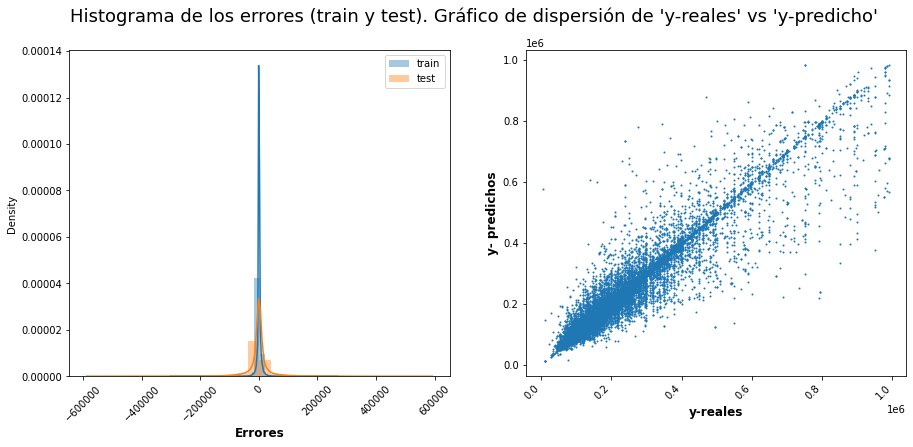

In [ ]:
plt.figure(figsize = (15,6))
plt.suptitle("Histograma de los errores (train y test). Gráfico de dispersión de 'y-reales' vs 'y-predicho'", fontsize = 18, color = "black")

plt.subplot(1,2,1)
sns.distplot(ytrain_xgb - ypred_train_xgb, bins = 30, label = 'train')
sns.distplot(ytest_xgb - ypred_test_xgb, bins = 30, label = 'test')
plt.xlabel("Errores", fontweight = "black", fontsize = 12)
plt.xticks(rotation = 45)
plt.legend()

plt.subplot(1,2,2)
plt.scatter(ytest_xgb, ypred_test_xgb, s=1) 
plt.xticks(rotation = 45, horizontalalignment="right")
plt.xlabel("y-reales", fontweight = "black", fontsize = 12)
plt.ylabel("y- predichos", fontweight = "black", fontsize = 12)

**Comentario:** luego de agregar al preprocesamiento de los datos la reducción de dimensionalidad con PCA, se ve que el modelo XGBOOST todavia muestra varianza y errores  elevados. Con lo cual no logre obtener un modelo que pueda considerar como apropiado.

Elijo quedarme con los modelos anteriores, sin aplicar PCA al preprocesamiento de datos porque considero que no se lograron mejorar los  problemas de varianza y los errores aumentaron.